# Bayesian Linear Regression

Bayesian Linear Regression covers regression which is Linear in the parameters. Using a basic function, $\phi(x)$ we can trivially include 'non-linear' functions under the bracket of Linear Regression.

## The Model

We model the weights, $\mathbf{W}$, as having a prior Normal distribution.

$\mathbf{W} \sim \mathcal{N}(0, \alpha^{-1}\mathbf{I})$

$\mathbf{y} \sim \mathcal{N}(\Phi \mathbf{W}, \beta^{-1} \mathbf{I})$

Where $\Phi$ is the matrix of basis functions (rows correspond to samples, columns to features).

## Inference

This is a conjugate model, so we know $P(\mathbf{W} \mid \mathbf{y}, \mathbf{X})$ is also a Normal distribution.

We can find this by first recognizing $P(\mathbf{W}, \mathbf{y} \mid \mathbf{X}) \propto P(\mathbf{W}\mid \mathbf{y} , \mathbf{X})$, and discarding terms terms independent of $\mathbf{W}$, combining what remains into a normal, and renormalizing (see PRML Bishop for more details).

Doing this gives us:

$P(\mathbf{W} \mid \mathbf{y}, \mathbf{X}) = \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$

$\Sigma = (\alpha \mathbf{I} + \beta \mathbf{\Phi}^{T}\mathbf{\Phi})^{-1}$<br/>
$\mu = \beta \Sigma \mathbf{\Phi}^{T} \mathbf{y}$

## Generating Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
x = np.random.uniform(low=-3, high=5, size=(40,1))
y = 0.1*x**3 - 3*x + 2 + np.random.normal(scale=0.3, size=x.shape)

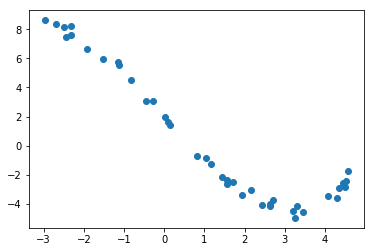

In [24]:
plt.scatter(x,y)

In [25]:
def phi(x):
    design_matrix = np.concatenate([np.ones(x.shape), x, x**2, x**3], axis=1)
    return design_matrix
    

In [26]:
print(x.shape, phi(x).shape)

(40, 1) (40, 4)


## Model



In [28]:
alpha = 1
beta = 1/0.4

posterior_precision =alpha * np.identity(phi(x).shape[1])+ beta * np.dot(phi(x).T, phi(x))
posterior_mean = beta * np.dot(np.linalg.inv(posterior_precision),np.dot(phi(x).T, y))

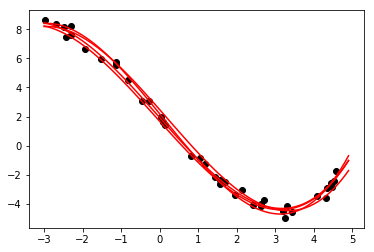

In [41]:
plt.scatter(x,y, c='k')
ar = np.arange(-3,5, 0.1).reshape(-1,1)
for i in range(4):
    w_sample = np.random.multivariate_normal(posterior_mean.ravel(), 
                                             np.linalg.inv(posterior_precision))
    plt.plot(ar, np.dot(phi(ar), w_sample), c='r')